In [25]:
# PROBLEM STATEMENT

# Form Cluster of the patients based on their age, sex, habits, duration of supervision, physiology and chemical nature of their body fluids to 
# identify different treatement procedures that could be followed for their treatment


In [26]:
import pandas as pd

In [27]:
df =pd.read_csv("C://Users//rrosh//OneDrive//Documents//Dataset//heart+failure+clinical+records//heart_failure_clinical_records_dataset.csv")

In [28]:
df1=pd.read_csv("C://Users//rrosh//OneDrive//Documents//Dataset//heart+failure+clinical+records//heart_failure_clinical_records_dataset.csv")
df1.drop(['DEATH_EVENT'],inplace =True, axis =1)

# df dataframe is used for developing, training and testing the models used
# df1 dataframe is used to describe the clusters that was prepared by the model


In [29]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [30]:
df.drop(['DEATH_EVENT'],inplace =True,axis =1)     # dependent variable is dropped for optimal cluster formation

In [31]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [32]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [34]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [35]:
df.shape

(299, 12)

In [36]:
from sklearn.preprocessing import StandardScaler     

# since the elements of the column vary in an extended range and differ from column to column here the elements are scaled to give equal weightage
# to all the elements of the columns


In [37]:
ss = StandardScaler()

In [38]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [39]:
column = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium', 'time']

In [40]:
df[column] = ss.fit_transform(df[column])

In [41]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,1.9,-1.504036,1,0,-1.629502
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,1.1,-0.141976,1,0,-1.603691
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,1.3,-1.731046,1,1,-1.590785
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,1.9,0.085034,1,0,-1.590785
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,2.7,-4.682176,0,0,-1.577879


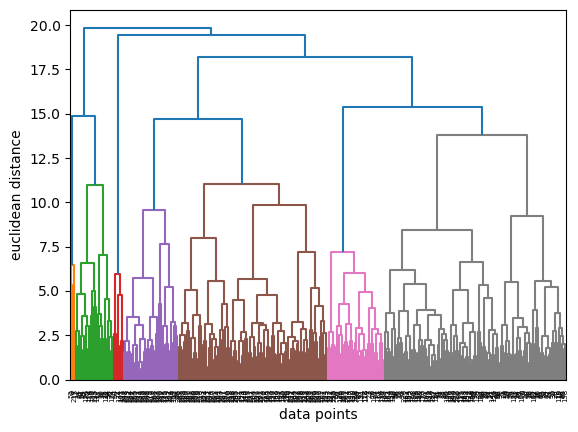

In [42]:
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
merg = linkage(df, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

# pictorial representation of Clustering as Dendogram

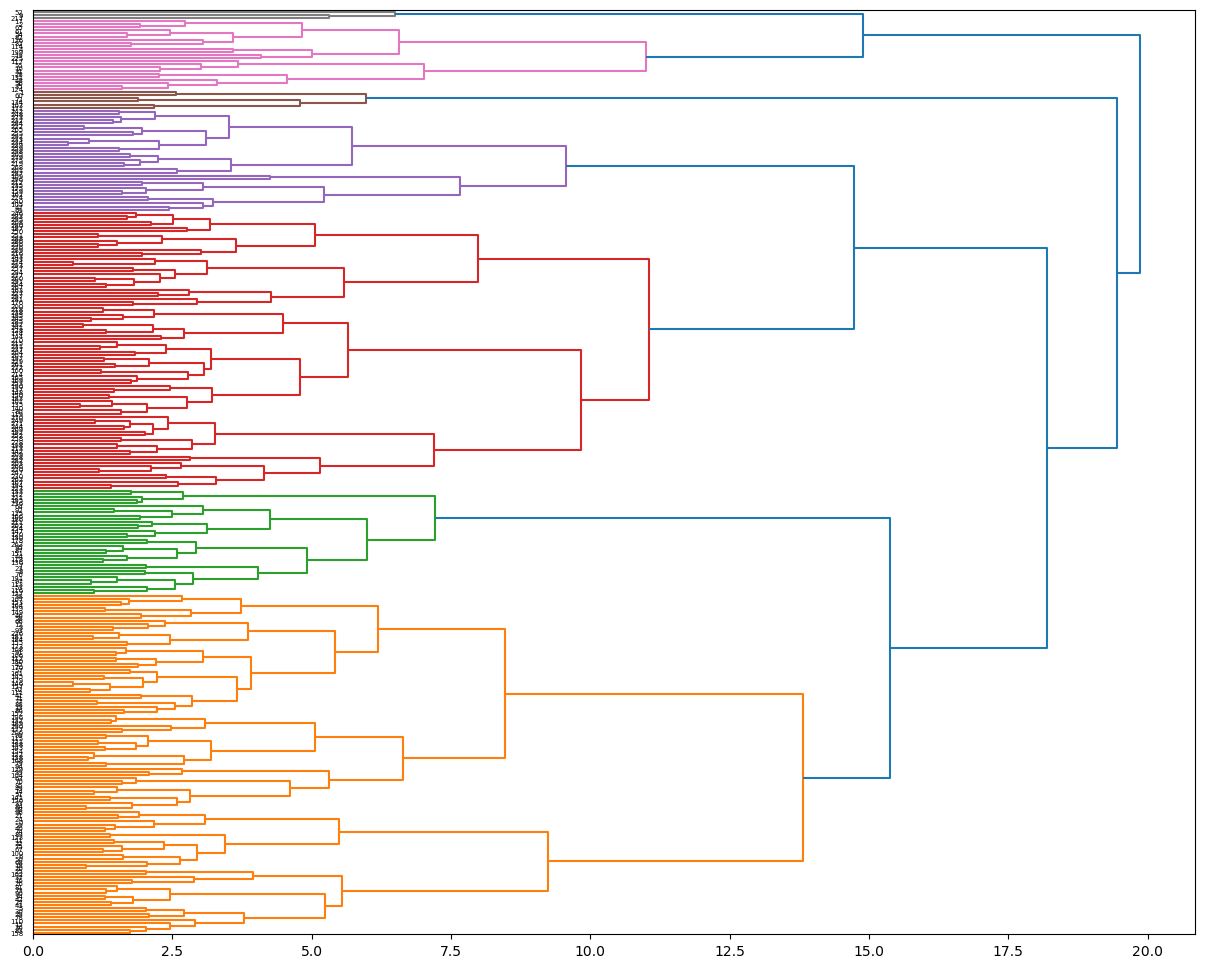

In [43]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(df, 'ward')

#labelList = ["foo" for i in range(0, 20)]

plt.figure(figsize=(15, 12))
dendrogram(
            linked,
            orientation='right',
            #labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.show()

C:\Users\rrosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rrosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\rrosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rrosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

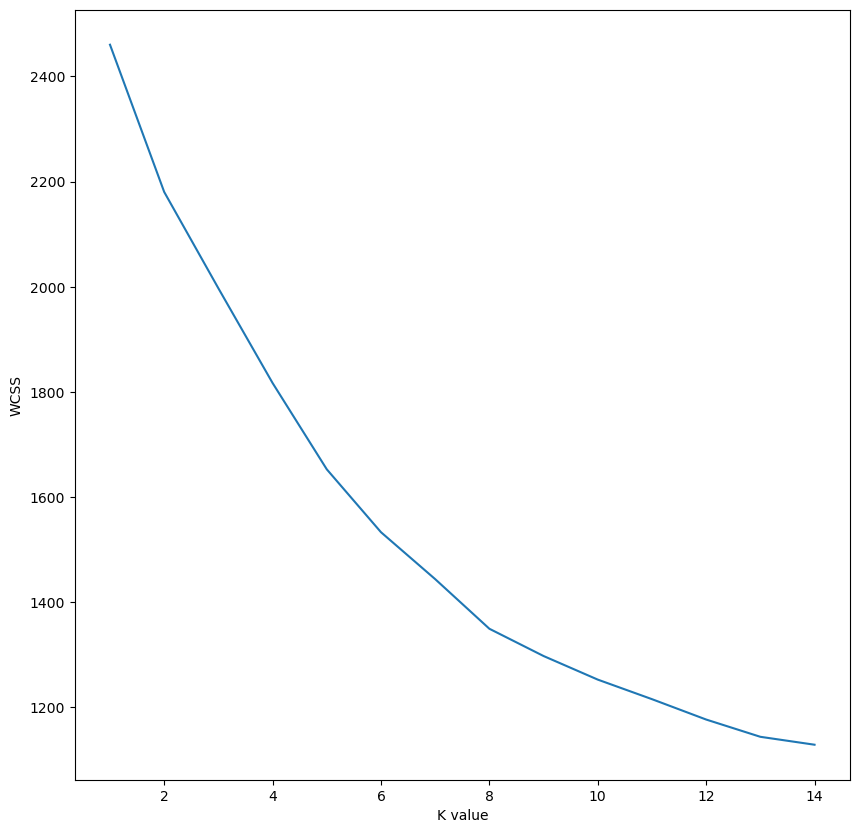

In [44]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(df)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

# to identify the optimal number of Clusters from elbow method

C:\Users\rrosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rrosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\rrosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rrosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

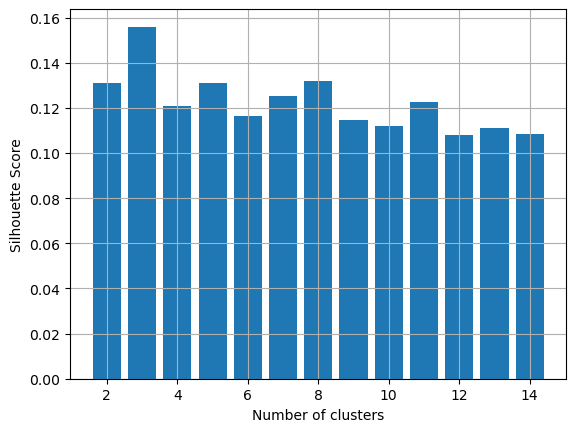

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show()

# to identify the optimal number of KMeans Clusters from Silhouette Score

In [46]:
kmeans = KMeans(n_clusters = 3)

In [47]:

# KMeans Clustering is a type of partition Clustering where the elements are divided in n clusters specified and then the distribution
# is revised to attain the most optimum clusters


In [48]:
cluster = kmeans.fit_predict(df)

C:\Users\rrosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rrosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [49]:
cluster      # Cluster distribution of KMeans cluster

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 2, 0,
       1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1,
       0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
df['Clusters'] = cluster

In [51]:
df1['Clusters'] = cluster

In [52]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Clusters
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,1.9,-1.504036,1,0,-1.629502,0
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,1.1,-0.141976,1,0,-1.603691,0
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,1.3,-1.731046,1,1,-1.590785,0
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,1.9,0.085034,1,0,-1.590785,0
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,2.7,-4.682176,0,0,-1.577879,0


In [53]:
df.to_csv("C://Users//rrosh//OneDrive//Documents//Dataset//heart+failure+clinical+records//heart_failure_clinical_records_dataset_kmeans.clusters.csv")

# exporting the prepared Cluster distribution through KMeans clustering as heart_failure_clinical_records_dataset_kmeans.clusters


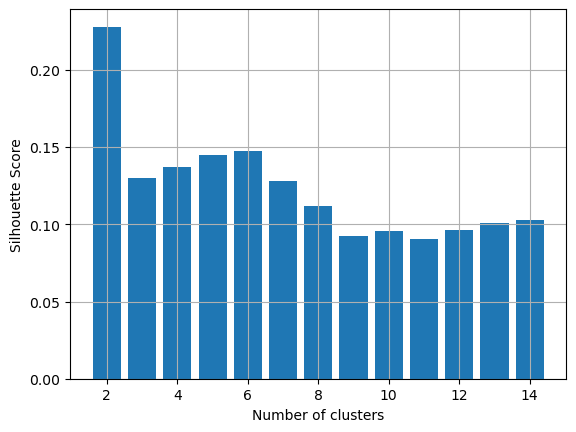

In [54]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df))) #dataset should be put properly
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show()

# to identify the optimal number of Agglomerative clusters

In [55]:
ag = AgglomerativeClustering(n_clusters = 3)

In [56]:

# Agglomerative Clustering is a type of hierarchical clustering where initially we put each elements in a single cluster and starts to combine the clusters based on their similar 
# characterstics till the time we have a single cluster of all the elements 


In [57]:
cluster1 = ag.fit_predict(df)

In [58]:
cluster1     # Cluster distribution of Agglomerative Clustering

array([1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2,
       2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1,
       0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0], dtyp

In [59]:
df['Cluster1'] = cluster1

In [60]:
df1['Cluster1'] = cluster1

In [61]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Clusters,Cluster1
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,1.9,-1.504036,1,0,-1.629502,0,1
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,1.1,-0.141976,1,0,-1.603691,0,0
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,1.3,-1.731046,1,1,-1.590785,0,1
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,1.9,0.085034,1,0,-1.590785,0,1
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,2.7,-4.682176,0,0,-1.577879,0,1


In [62]:
df.to_csv("C://Users//rrosh//OneDrive//Documents//Dataset//heart+failure+clinical+records//heart_failure_clinical_records_dataset_AG.clusters_1.csv")

# exporting the prepared Cluster through Agglomerative Clustering as heart_failure_clinical_records_dataset_AG.clusters_1

In [63]:
new_data = pd.read_csv("C://Users//rrosh//OneDrive//Documents//Dataset//heart+failure+clinical+records//New_Data.csv")


In [64]:
new_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,65,1,160,1,20,0,327000,2.7,116,0,0,8
1,62,0,231,0,25,1,253000,0.9,140,1,1,10
2,60,0,2261,0,35,1,228000,0.9,136,1,0,115
3,68,1,1021,1,35,0,271000,1.1,134,1,0,197
4,42,1,86,0,35,0,365000,1.1,139,1,1,201


In [65]:
kmeans.predict(new_data)

# applying the prepared model on new data to predict the clusters for the new data from KMeans Clustering


array([2, 2, 2, 2, 2])

In [66]:
predictions = ag.fit_predict(new_data)

# applying the prepared model on new data to predict the clusters for the new data from Agglomerative Clustering


In [67]:
print(predictions)

[0 1 2 1 0]


In [68]:
silhouette_score(df, AgglomerativeClustering(n_clusters = 3).fit_predict(df))      # To analyze the performance of Agglomerative Clustering

0.2170760558972471

In [69]:
silhouette_score(df, KMeans(n_clusters = 3).fit_predict(df))     # To analyze the performance of KMeans Clustering

C:\Users\rrosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rrosh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


0.21773766202467676

In [70]:
df1[df1['Clusters']==0].describe()  # for KMeans Clustering

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Clusters,Cluster1
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0,56.000000
mean,66.553571,0.375000,791.410714,0.392857,32.178571,0.339286,245336.861429,2.590893,131.910714,0.732143,0.303571,77.321429,0.0,0.875000
std,12.742084,0.488504,1458.620204,0.492805,11.770699,0.477752,83181.486521,1.823244,5.257987,0.446850,0.463961,66.295237,0.0,0.384353
min,42.000000,0.000000,23.000000,0.000000,14.000000,0.000000,62000.000000,0.800000,113.000000,0.000000,0.000000,4.000000,0.0,0.000000
25%,60.000000,0.000000,112.500000,0.000000,23.750000,0.000000,210000.000000,1.625000,130.000000,0.000000,0.000000,26.750000,0.0,1.000000
50%,65.000000,0.000000,399.000000,0.000000,30.000000,0.000000,252000.000000,1.950000,133.500000,1.000000,0.000000,59.500000,0.0,1.000000
75%,75.000000,1.000000,582.000000,1.000000,38.000000,1.000000,267250.000000,2.750000,134.250000,1.000000,1.000000,107.250000,0.0,1.000000
max,95.000000,1.000000,7861.000000,1.000000,70.000000,1.000000,497000.000000,9.400000,146.000000,1.000000,1.000000,250.000000,0.0,2.000000


In [71]:


# Number of values in Cluster_1 (KMeans) = 146
# Cluster_1(KMeans) contains Male and Female individuals in the age category of 45-95 ( major portion between 45 to 75 years) who are anemic and diabetic, whose creatnine_phosphokinase
# value lies in the range 23-5882 mcg/L ( major portion between 23 to 582 mcg/L), percentage of blood leaving the heart at each contraction is between 15 to 80 percentage, platlets count lies 
# in the range of 47000-621000 kiloplatlets per ( major portion between 47000 to 304750 kiloplatlets per ml), level of serum creatinine in the blood lies between 0.6 to 3.2 mg/dl ( major portion between 0.6 to 1.3 mg/dl),level of serum sodium in the 
# blood lies between 125 to 148 mEq/L and were under observation for a period of 4 to 256 days ( major portion between 4 to 110 days)




In [72]:
df1[df1['Clusters']==1].describe()  #for KMeans Clustering

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Clusters,Cluster1
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,120.000000
mean,54.786117,0.366667,759.383333,0.500000,34.800000,0.233333,263611.018917,1.107750,137.008333,0.658333,0.316667,195.850000,1.0,0.100000
std,9.177860,0.483915,1067.955993,0.502096,8.060277,0.424726,99531.370941,0.348559,3.218893,0.476257,0.467127,52.572743,0.0,0.437718
min,40.000000,0.000000,54.000000,0.000000,15.000000,0.000000,25100.000000,0.500000,129.000000,0.000000,0.000000,55.000000,1.0,0.000000
25%,48.750000,0.000000,163.000000,0.000000,30.000000,0.000000,214500.000000,0.900000,135.000000,0.000000,0.000000,171.750000,1.0,0.000000
50%,53.000000,0.000000,436.500000,0.500000,35.000000,0.000000,263358.030000,1.000000,137.000000,1.000000,0.000000,209.000000,1.0,0.000000
75%,61.250000,1.000000,719.250000,1.000000,40.000000,0.000000,303500.000000,1.200000,140.000000,1.000000,1.000000,241.750000,1.0,0.000000
max,73.000000,1.000000,7702.000000,1.000000,60.000000,1.000000,742000.000000,2.700000,144.000000,1.000000,1.000000,285.000000,1.0,2.000000


In [73]:


# Number of values in Cluster_2 (KMeans) = 135
# Cluster_2(KMeans) contains Male & Female individuals in the age category of 40-73 ( major portion between 40 to 60 years) who are anemic and diabetic, whose creatnine_phosphokinase 
# value lies in the range 54-7861 mcg/L ( major portion between 54 to 639 mcg/L), percentage of blood leaving the heart at each contraction is between 14 to 62 percentage, platlets count lies 
# in the range of 25100-850000 kiloplatlets per ml ( major portion between 25100 to 302500 kiloplatlets per ml), level of serum creatinine in the blood lies between 0.5 to 3.4 mg/dl ( major portion between 0.5 to 1.2 mg/dl),level of serum sodium in the 
# blood lies between 127 to 145 mEq/L and were under observation for a period of 6 to 285 days)




In [74]:
df1[df1['Clusters']==2].describe()  #for KMeans Clustering

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Clusters,Cluster1
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.0,123.000000
mean,64.130081,0.520325,313.211382,0.349593,43.975610,0.471545,271315.969431,1.128049,138.398374,0.601626,0.333333,90.373984,2.0,1.886179
std,11.326712,0.501630,322.606197,0.478792,12.437031,0.501231,101833.958302,0.433039,3.386908,0.491566,0.473333,53.991863,0.0,0.465238
min,41.000000,0.000000,30.000000,0.000000,20.000000,0.000000,47000.000000,0.600000,131.000000,0.000000,0.000000,10.000000,2.0,0.000000
25%,58.000000,0.000000,96.500000,0.000000,35.000000,0.000000,217000.000000,0.900000,136.000000,0.000000,0.000000,57.000000,2.0,2.000000
50%,64.000000,1.000000,159.000000,0.000000,40.000000,0.000000,263358.030000,1.000000,138.000000,1.000000,0.000000,87.000000,2.0,2.000000
75%,70.000000,1.000000,508.500000,1.000000,55.000000,1.000000,304500.000000,1.200000,140.000000,1.000000,1.000000,112.000000,2.0,2.000000
max,95.000000,1.000000,1808.000000,1.000000,80.000000,1.000000,850000.000000,3.400000,148.000000,1.000000,1.000000,256.000000,2.0,2.000000


In [75]:


# Number of values in Cluster_3 (KMeans) = 18
# Cluster_3(KMeans) contains Male & Female individuals in the age category of 42-80 ( major portion between 42 to 65 years) who are anemic and diabetic, whose creatnine_phosphokinase 
# value lies in the range 56-3964 mcg/L ( major portion between 56 to 582 mcg/L), percentage of blood leaving the heart at each contraction is between 17 to 70 percentage ( major portion between 17 to 39 percentage), platlets count lies
# in the range of 87000-388000 kiloplatlets per ml ( major portion between 87000 to 263358 kiloplatlets per ml), level of serum creatinine in the blood lies between 1.8 to 9.4 mg/dl ( major portion between 1.8 to 5.6 mg/dl),level of serum sodium in the 
# blood lies between 113 to 146 mEq/L and were under observation for a period of 8 to 250 days ( major portion between 8 to 166 days)




In [76]:
df1[df1['Cluster1']==0].describe()  #for Agglomerative Clustering

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Clusters,Cluster1
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.0
mean,56.268736,0.348837,871.534884,0.457364,35.116279,0.224806,254589.444419,1.155349,137.263566,0.689922,0.341085,188.782946,0.992248,0.0
std,10.474845,0.478460,1336.288266,0.500121,8.529020,0.419082,84598.208906,0.383945,3.738565,0.464328,0.475922,58.972446,0.342238,0.0
min,40.000000,0.000000,54.000000,0.000000,15.000000,0.000000,25100.000000,0.500000,127.000000,0.000000,0.000000,6.000000,0.000000,0.0
25%,50.000000,0.000000,167.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,135.000000,0.000000,0.000000,147.000000,1.000000,0.0
50%,55.000000,0.000000,418.000000,0.000000,35.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,206.000000,1.000000,0.0
75%,64.000000,1.000000,789.000000,1.000000,40.000000,0.000000,302000.000000,1.300000,140.000000,1.000000,1.000000,237.000000,1.000000,0.0
max,90.000000,1.000000,7861.000000,1.000000,60.000000,1.000000,543000.000000,2.700000,148.000000,1.000000,1.000000,285.000000,2.000000,0.0


In [77]:

# Number of values in Cluster_1 (Agglomerative Clustering) = 128
# Cluster_1(Agglomerative Clustering) contains Male & Female individuals in the age category of 40-85 ( major portion between 40 to 60 years) who are anemic and diabetic, 
# whose creatnine_phosphokinase value lies in the range 54-7861 mcg/L ( major portion between 54 to 849 mcg/L), percentage of blood leaving the heart at each contraction is between 14 to 60 
# percentage ( major portion between 14 to 38 percentage), platlets count lies in the range of 25100-850000 kiloplatlets per ml ( major portion between 25100 to 305750 kiloplatlets per ml), level of serum creatinine in the blood lies between 0.5 to 2.7 mg/dl ( major portion between 0.5 to 1.2 mg/dl),
# level of serum sodium in the blood lies between 127 to 145 mEq/L and were under observation for a period of 6 to 285 days




In [78]:
df1[df1['Cluster1']==1].describe()  #for Agglomerative Clustering

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Clusters,Cluster1
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0,47.0
mean,66.787234,0.446809,465.340426,0.382979,32.574468,0.404255,244556.344255,2.762766,131.489362,0.702128,0.297872,73.893617,0.0,1.0
std,13.008252,0.502538,610.279169,0.491369,12.486070,0.496053,72865.846440,1.934522,5.500484,0.462267,0.462267,65.331341,0.0,0.0
min,42.000000,0.000000,23.000000,0.000000,14.000000,0.000000,87000.000000,0.800000,113.000000,0.000000,0.000000,4.000000,0.0,1.0
25%,60.000000,0.000000,105.000000,0.000000,22.500000,0.000000,210000.000000,1.750000,130.000000,0.000000,0.000000,26.000000,0.0,1.0
50%,65.000000,0.000000,364.000000,0.000000,30.000000,0.000000,250000.000000,2.100000,132.000000,1.000000,0.000000,54.000000,0.0,1.0
75%,75.000000,1.000000,582.000000,1.000000,38.000000,1.000000,265500.000000,3.250000,134.000000,1.000000,1.000000,103.500000,0.0,1.0
max,95.000000,1.000000,3964.000000,1.000000,70.000000,1.000000,461000.000000,9.400000,146.000000,1.000000,1.000000,250.000000,0.0,1.0


In [79]:


# Number of values in Cluster_1 (Agglomerative Clustering) = 19
# Cluster_2(Agglomerative Clustering) contains Male & Female individuals in the age category of 42-95 ( major portion between 40 to 73 years) who are anemic and diabetic,
# whose creatnine_phosphokinase value lies in the range 23-1808 mcg/L ( major portion between 23 to 582 mcg/L), percentage of blood leaving the heart at each contraction is between 15 to 80 
# percentage ( major portion between 15 to 50 percentage), platlets count lies in the range of 47000-621000 kiloplatlets per ml ( major portion between 47000 to 302500 kiloplatlets per ml), level of serum creatinine in the blood lies between 0.6 to 3.4 mg/dl ( major portion between 0.6 to 1.3 mg/dl),
# level of serum sodium in the blood lies between 125 to 148 mEq/L and were under observation for a period of 4 to 256 days ( major portion between 4 to 117 days)




In [80]:
df1[df1['Cluster1']==2].describe()  #for Agglomerative Clustering

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Clusters,Cluster1
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.0
mean,63.346886,0.512195,322.528455,0.390244,43.300813,0.463415,279738.733659,1.120976,137.918699,0.585366,0.308943,90.422764,1.934959,2.0
std,11.163334,0.501896,352.069929,0.489800,12.592565,0.500699,115613.837355,0.437329,3.034213,0.494674,0.463947,54.870041,0.278751,0.0
min,41.000000,0.000000,30.000000,0.000000,20.000000,0.000000,47000.000000,0.600000,131.000000,0.000000,0.000000,10.000000,0.000000,2.0
25%,57.000000,0.000000,96.000000,0.000000,35.000000,0.000000,217000.000000,0.900000,136.000000,0.000000,0.000000,57.000000,2.000000,2.0
50%,63.000000,1.000000,157.000000,0.000000,40.000000,0.000000,263358.030000,1.000000,138.000000,1.000000,0.000000,86.000000,2.000000,2.0
75%,70.000000,1.000000,579.500000,1.000000,50.000000,1.000000,307500.000000,1.200000,140.000000,1.000000,1.000000,112.000000,2.000000,2.0
max,95.000000,1.000000,2060.000000,1.000000,80.000000,1.000000,850000.000000,3.400000,145.000000,1.000000,1.000000,278.000000,2.000000,2.0


In [81]:


# Number of values in Cluster_1 (Agglomerative Clustering) = 128
# Cluster_3(Agglomerative Clustering) contains Male & Female individuals in the age category of 42-80 ( major portion between 42 to 65 years) who are anemic and diabetic, whose 
# creatnine_phosphokinase value lies in the range 56-3964 mcg/L ( major portion between 56 to 582 mcg/L), percentage of blood leaving the heart at each 
# contraction is between 17 to 70 percentage ( major portion between 17 to 39 percentage) , platlets count lies in the range of 70000-388000 kiloplatlets
# per ml, level of serum creatinine in the blood lies between 1.8 to 9.4 mg/dl,level of serum sodium in the blood lies between 113 to 146 mEq/L and were 
# under observation for a period of 8 to 250 days ( major portion between 8 to 160 days)



